# IBM Capstone
___
Prepared by [Ali Rifat Kaya](https://www.linkedin.com/in/alirifatkaya/)
___

In [56]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.set_option("display.max_columns", 40)

# Understanding the Dataset and Research Question

# Import Libraries and Read Data

In [2]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)

In [3]:
raw_data = pd.read_csv('Data-Collisions.csv', dtype={'ST_COLCODE' : str}, header=0)
df = pd.read_csv('Data-Collisions.csv', dtype={'ST_COLCODE' : str}, header=0)

In [4]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }</style>'))

# Preprocessing

In [5]:
', '.join(df.columns)

'SEVERITYCODE, X, Y, OBJECTID, INCKEY, COLDETKEY, REPORTNO, STATUS, ADDRTYPE, INTKEY, LOCATION, EXCEPTRSNCODE, EXCEPTRSNDESC, SEVERITYCODE.1, SEVERITYDESC, COLLISIONTYPE, PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT, INCDATE, INCDTTM, JUNCTIONTYPE, SDOT_COLCODE, SDOT_COLDESC, INATTENTIONIND, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND, PEDROWNOTGRNT, SDOTCOLNUM, SPEEDING, ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY, HITPARKEDCAR'

In [6]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


* In the dataset, the target variable is `SEVERITYCODE` which gives the severity of the collision.
* In the first look, we see that there are two similar features to the target variable such as `SEVERITYCODE.1` and `SEVERITYDESC`. It will be the best to see those features in a separate dataframe.

In [7]:
df['SEVERITYCODE,SEVERITYCODE.1,SEVERITYDESC'.split(',')]

,SEVERITYCODE,SEVERITYCODE.1,SEVERITYDESC
0,2,2,Injury Collision
1,1,1,Property Damage Only Collision
2,1,1,Property Damage Only Collision
3,1,1,Property Damage Only Collision
4,2,2,Injury Collision
...,...,...,...
194668,2,2,Injury Collision
194669,1,1,Property Damage Only Collision
194670,2,2,Injury Collision
194671,2,2,Injury Collision


In [8]:
# check the relationship between those 3 features
if df['SEVERITYCODE'].equals(df['SEVERITYCODE.1']) == True:
    print('Two attributes (SEVERITYCODE and SEVERITYCODE.1) are exactly same.')
temp = np.where(df.SEVERITYDESC == 'Injury Collision', 2, 1)
temp = temp.astype(np.int64) # typecasting to be same with SEVERITYCODE
if df['SEVERITYCODE'].equals(pd.Series(temp)) == True:
    print('Two attributes (SEVERITYCODE and SEVERITYDESC) are exactly same.')

Two attributes (SEVERITYCODE and SEVERITYCODE.1) are exactly same.
Two attributes (SEVERITYCODE and SEVERITYDESC) are exactly same.


* All variables are same so that it is appropriate to drop __SEVERITYCODE.1__ and __SEVERITYDESC__from the dataset.
* __SEVERITYCODE__ is the encoded version of __SEVERITYDESC__ which tells us that `1` represents _Property Damage Only Collision_ and `2` represents _Injury Collision_.
* Let's have a look to class distribution.

In [9]:
print('Number of observations in the negative class (SEVERITYCODE = 1 / Property damage): {}'.format(
    df[df.SEVERITYCODE == 1].shape[0]))
print('Number of observations in the positive class (SEVERITYCODE = 2 / Injury): {}'.format(
    df[df.SEVERITYCODE == 2].shape[0]))
print('Number of missing values in the target variable: {}'.format(
    df[df.SEVERITYCODE.isnull() == True].shape[0]))

Number of observations in the negative class (SEVERITYCODE = 1 / Property damage): 136485
Number of observations in the positive class (SEVERITYCODE = 2 / Injury): 58188
Number of missing values in the target variable: 0


In [10]:
print('Class Distribution')
print('Negative Class:', round(df[df.SEVERITYCODE == 1].shape[0] / df.shape[0], 3))
print('Positive Class:', round(df[df.SEVERITYCODE == 2].shape[0] / df.shape[0], 3))

Class Distribution
Negative Class: 0.701
Positive Class: 0.299


In [11]:
t_missing = [sum(df[column].isnull()) for column in df.columns]
t_missing_perc = [round((sum(df[column].isnull()) / df.shape[0]) * 100, 3)
                     for column in df.columns]
t_unique = [len(df[column].unique()) for column in df.columns]
df_missing = pd.DataFrame({'columns': df.columns, 'num_missing': t_missing,
                           'perc_missing': t_missing_perc,
                           'num_unique': t_unique})
df_missing.sort_values(['perc_missing', 'num_unique'],
                       ascending=[True, False]).reset_index(drop=True)

,columns,num_missing,perc_missing,num_unique
0,OBJECTID,0,0.000,194673
1,INCKEY,0,0.000,194673
2,COLDETKEY,0,0.000,194673
3,REPORTNO,0,0.000,194670
4,INCDTTM,0,0.000,162058
5,INCDATE,0,0.000,5985
6,CROSSWALKKEY,0,0.000,2198
7,SEGLANEKEY,0,0.000,1955
8,PERSONCOUNT,0,0.000,47
9,SDOT_COLCODE,0,0.000,39


* As seen from the above table, there is a threshold in the percentage of missing values. The variables have percentage of missing values either less than __5%__ or more than __40%__.
* When the size of the dataset is considered, any variable that has percentage of missing values less than 5% is acceptable. However, the rest of the variables will need further examination.
* Moreover, __OBJECTID__, __INCKEY__, __COLDETKEY__ and __REPORTNO__ have unique values for each observation that means they do not have explanatory power.
* Another important thing is that __SDOTCOLNUM__ is also a unique variable. We can see it by adding number of missing values and non-missing values which gives the number of all observations.
* Let's have a look to unique values of variables.

In [12]:
missing_40 = 'SDOTCOLNUM,EXCEPTRSNCODE,INTKEY,INATTENTIONIND,SPEEDING,EXCEPTRSNDESC,PEDROWNOTGRNT'.split(',')
for column in missing_40:
    print(column + ' unique values:')
    print('-'*80)
    print(df[column].value_counts(), end='\n\n')

SDOTCOLNUM unique values:
--------------------------------------------------------------------------------
4116034.0     2
11200007.0    2
4112025.0     2
4116048.0     2
5036003.0     1
             ..
6262043.0     1
6162018.0     1
6277003.0     1
8267022.0     1
5071015.0     1
Name: SDOTCOLNUM, Length: 114932, dtype: int64

EXCEPTRSNCODE unique values:
--------------------------------------------------------------------------------
       79173
NEI     5638
Name: EXCEPTRSNCODE, dtype: int64

INTKEY unique values:
--------------------------------------------------------------------------------
29973.0    252
29933.0    160
29913.0    138
29549.0    136
33512.0    128
          ... 
36825.0      1
26604.0      1
26603.0      1
36816.0      1
27793.0      1
Name: INTKEY, Length: 7614, dtype: int64

INATTENTIONIND unique values:
--------------------------------------------------------------------------------
Y    29805
Name: INATTENTIONIND, dtype: int64

SPEEDING unique values:
------

* Among the variables that have percentage of missing values over 40%, there are some useful variables. It is not the best practices to drop all those variables. 
* __SPEEDING__, __INATTENTIONIND__ and __PEDROWNOTGRNT__ variables are naturally dummy variables. For example, let's think about __SPEEDING__. A driver can only be in one of the categories, either he did speeding or not. There are not another option. This logic also applies __INATTENTIONIND__ and __PEDROWNOTGRNT__. 
* This approach does gives us one explanation which is, for those features, only the positive cases are present in the dataset. In other words, missing values represents the negative cases. For this reason, it is better to recode missing values as negative cases.
* It is possible to do a sanity check on these features. For example, a quick Google search will show that speeding accounts for 17%-26% of all fatal crashes. However, the dataset does not include any fatal case. For this reason, this kind of a statistic will not work for the dataset. On the other hand, the fatal crashes are a small proportion of all crashes/collisions which means that speeding accounts for a smaller portion of all crashes/collusions. 
* As a result, we will keep those variables in the dataset.

In [13]:
# Let's look at the pair columns: code-description
pair_columns = 'SDOT_COLCODE,SDOT_COLDESC,EXCEPTRSNCODE,EXCEPTRSNDESC,ST_COLCODE,ST_COLDESC'.split(',')
df[pair_columns]

,SDOT_COLCODE,SDOT_COLDESC,EXCEPTRSNCODE,EXCEPTRSNDESC,ST_COLCODE,ST_COLDESC
0,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",,NaN,10,Entering at angle
1,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,NaN,11,From same direction - both going straight - bo...
2,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,32,One parked--one moving
3,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",,NaN,23,From same direction - all others
4,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,10,Entering at angle
...,...,...,...,...,...,...
194668,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",,NaN,24,From opposite direction - both moving - head-on
194669,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",,NaN,13,From same direction - both going straight - bo...
194670,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",,NaN,28,From opposite direction - one left turn - one ...
194671,51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,,NaN,5,Vehicle Strikes Pedalcyclist


* In the above table, we see that __SDOT_COLCODE__ and __ST_COLCODE__, and __SDOT_COLDESC__ and __ST_COLDESC__ tells the same story from different perspectives.
* Besides, __EXCEPTRSNCODE__ and __EXCEPTRSNDESC__ do not contain any information. Besides, there is no explanation provided about those variables in the Meta Data.

In [14]:
# Let's look at the KEY variables
keys = 'CROSSWALKKEY,SEGLANEKEY,INTKEY,ADDRTYPE'.split(',')
df[keys]

,CROSSWALKKEY,SEGLANEKEY,INTKEY,ADDRTYPE
0,0,0,37475.0,Intersection
1,0,0,NaN,Block
2,0,0,NaN,Block
3,0,0,NaN,Block
4,0,0,34387.0,Intersection
...,...,...,...,...
194668,0,0,NaN,Block
194669,0,0,NaN,Block
194670,0,0,24760.0,Intersection
194671,0,4308,24349.0,Intersection


* In the table about frequencies and missing values, we see that __CROSSWALKKEY__ and __SEGLANEKEY__ do not contain any missing values but __INTKEY__ contains. The reason for that is all missing values in __CROSSWALKKEY__ and __SEGLANEKEY__ are coded `0`. 
* The idea about the key features is that they are given identification numbers for the particular area where the collision happened. For example, __CROSSWALKKEY__ has keys for the _crosswalks_ where the collisions occurred as __SEGLANEKEY__ and __INTKEY__.
* For this reason, it is possible to convert those variables into dummy variables by combining all keys into a single category.

In [15]:
counts = 'PERSONCOUNT,VEHCOUNT,PEDCOUNT,PEDCYLCOUNT'.split(',')
df[counts]

,PERSONCOUNT,VEHCOUNT,PEDCOUNT,PEDCYLCOUNT
0,2,2,0,0
1,2,2,0,0
2,4,3,0,0
3,3,3,0,0
4,2,2,0,0
...,...,...,...,...
194668,3,2,0,0
194669,2,2,0,0
194670,3,2,0,0
194671,2,1,0,1


* There are no missing values for the above features so that we leave them as is.

In [16]:
display(df.HITPARKEDCAR.value_counts())
display(df.HITPARKEDCAR.unique())

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

array(['N', 'Y'], dtype=object)

In [17]:
display(df.ADDRTYPE.value_counts())
display(df.ADDRTYPE.unique())

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

array(['Intersection', 'Block', 'Alley', nan], dtype=object)

In [18]:
display(df.UNDERINFL.value_counts())
display(df.UNDERINFL.unique())

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

array(['N', '0', nan, '1', 'Y'], dtype=object)

In [19]:
display(df.COLLISIONTYPE.value_counts())
display(df.COLLISIONTYPE.unique())

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', nan, 'Left Turn', 'Pedestrian',
       'Right Turn'], dtype=object)

## Clean the Data

In [20]:
to_drop = 'OBJECTID,INCKEY,COLDETKEY,REPORTNO,SDOTCOLNUM,EXCEPTRSNCODE'.split(',')
to_drop.extend('EXCEPTRSNDESC,SEVERITYDESC,SEVERITYCODE.1,INCDATE,ST_COLCODE'.split(','))
df_clean = df.drop(to_drop, axis=1)
df_clean.head()

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,Entering at angle,0,0,N
1,1,-122.347294,47.647172,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,Entering at angle,0,0,N


In [21]:
', '.join([column for column in df_clean.columns])

'SEVERITYCODE, X, Y, STATUS, ADDRTYPE, INTKEY, LOCATION, COLLISIONTYPE, PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT, INCDTTM, JUNCTIONTYPE, SDOT_COLCODE, SDOT_COLDESC, INATTENTIONIND, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND, PEDROWNOTGRNT, SPEEDING, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY, HITPARKEDCAR'

### Categorical Variables

* Regarding the categorical variables, we have to decide how we will keep them in the data. One way is to keep them as they are; however, it may not be the best practice. Because, when we have closer look to the categorical variables, we see that there is a dominant category and there are mostly rare levels (levels that are less than 5%).
* It is possible to convert categorical variables into dummy variables but this kind of approach with current categorical variables will result with a sparse data structure. However, it is not beneficial to have a sparse data with machine learning algorithms.
* For this reason, we will consolidate the rare levels and convert the categorical variables into binary variables.
* Another problem is missing values with the categorical variables, however; it is ok to replace the missing values with the most frequent values since there is a great difference between the dominant levels and the secondary levels.

In [22]:
df_clean.fillna('NA', inplace=True)
df_clean.replace(to_replace=' ', value='NA', inplace=True)

In [23]:
def get_frequency(df, column):
    t_freq = [round((df[df[column] == value].shape[0] / df.shape[0]) * 100, 3)
             for value in df[column].unique()]
    temp1 = pd.DataFrame({'freq': t_freq}, index=df[column].unique())
    return temp1

In [24]:
def get_summary(df, column):
    temp = df.groupby(['SEVERITYCODE',
                       column]).size().rename('count').to_frame()
    temp = temp.reset_index(level=1).pivot(columns=column)
    temp.T.plot.bar()
    return temp

##addrtype

In [25]:
get_frequency(df_clean, 'ADDRTYPE')

,freq
Intersection,33.425
Block,65.200
Alley,0.386
NA,0.989


count                          
ADDRTYPE     Alley  Block Intersection    NA
SEVERITYCODE                                
1              669  96830        37251  1735
2               82  30096        27819   191

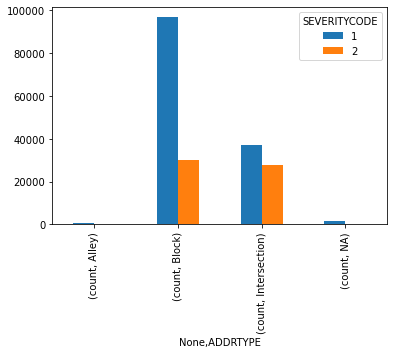

In [26]:
get_summary(df_clean, 'ADDRTYPE')

* `addrtype` feature has 3 levels but the most dominant level is __Block__. Moreover, the __Alley__ level is the rarest one and it can be combined with __Block__ since they both have similar class distributions. Finally, the best way to deal with the missing values is to replace them with the most frequent value.

In [27]:
df_clean.ADDRTYPE = np.where(df_clean.ADDRTYPE == 'NA',
                             df_clean.ADDRTYPE.mode(), df_clean.ADDRTYPE)
df_clean.ADDRTYPE = np.where(df_clean.ADDRTYPE == 'Alley', 'Block',
                             df_clean.ADDRTYPE)

##collisiontype

In [28]:
get_frequency(df_clean, 'COLLISIONTYPE')

,freq
Angles,17.811
Sideswipe,9.559
Parked Car,24.650
Other,12.176
Cycles,2.782
Rear Ended,17.511
Head On,1.040
NA,2.519
Left Turn,7.039
Pedestrian,3.394


count                                                   \
COLLISIONTYPE Angles Cycles Head On Left Turn    NA  Other Parked Car   
SEVERITYCODE                                                            
1              21050    671    1152      8292  3863  17591      45325   
2              13624   4744     872      5411  1041   6112       2662   

                                                          
COLLISIONTYPE Pedestrian Rear Ended Right Turn Sideswipe  
SEVERITYCODE                                              
1                    672      19419       2347     16103  
2                   5936      14671        609      2506

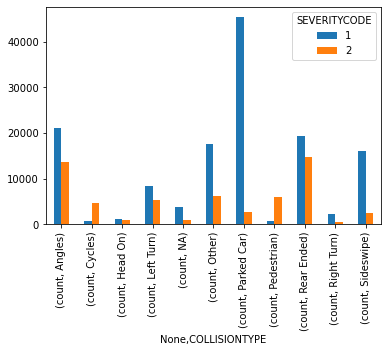

In [29]:
get_summary(df_clean, 'COLLISIONTYPE')

* It is possible to replace the missing values with the most frequent value, __Parked Car__ since they have similar class distributions.
* It is also possible to combine __Right Turn__ with __Sideswipe__ and __Head On__ with __Left Turn__ because of the similar structure of class distributions.
* We will also combine __Cycles__ with __Pedestrian__.

In [30]:
df_clean.COLLISIONTYPE.replace(to_replace=['NA', 'Right Turn', 'Head On', 
                                           'Cycles', 'Pedestrian'],
                               value=['Parked Car', 'Sideswipe', 'Left Turn', 
                                      'Injury Prone', 'Injury Prone'],
                               inplace=True)

##junctiontype

In [31]:
get_frequency(df_clean, 'JUNCTIONTYPE')

,freq
At Intersection (intersection related),32.264
Mid-Block (not related to intersection),46.129
Driveway Junction,5.481
Mid-Block (but intersection related),11.707
At Intersection (but not related to intersection),1.078
NA,3.251
Unknown,0.005
Ramp Junction,0.085


count  \
JUNCTIONTYPE At Intersection (but not related to intersection)   
SEVERITYCODE                                                     
1                                                         1475   
2                                                          623   

                                                                       \
JUNCTIONTYPE At Intersection (intersection related) Driveway Junction   
SEVERITYCODE                                                            
1                                             35636              7437   
2                                             27174              3234   

                                                   \
JUNCTIONTYPE Mid-Block (but intersection related)   
SEVERITYCODE                                        
1                                           15493   
2                                            7297   

                                                                          \
JUNCTIONTYPE Mid-Block (not related to intersection)    NA Ramp Junction   
SEVERITYCODE                                                               
1                                              70396  5929           112   
2                                              19404   400            54   

                      
JUNCTIONTYPE Unknown  
SEVERITYCODE          
1                  7  
2                  2

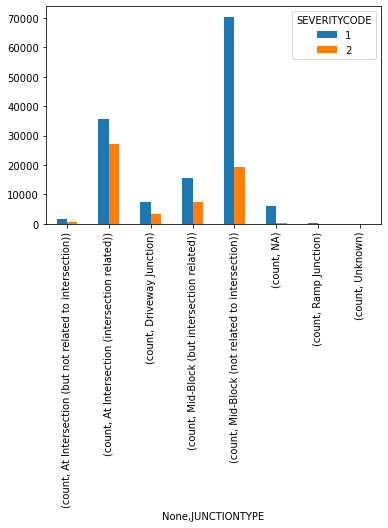

In [32]:
get_summary(df_clean, 'JUNCTIONTYPE')

* The missing values can be replaced with the mode.
* The rare classes can be combined into __Driveway Junction__ since they have similar class distributions.

In [33]:
df_clean.JUNCTIONTYPE.replace(to_replace=['At Intersection (but not related to intersection)',
                                          'NA', 'Unknown', 'Ramp Junction'],
                              value=['Driveway Junction', 
                                     'Mid-Block (not related to intersection)',
                                     'Driveway Junction',
                                     'Driveway Junction'],
                              inplace=True)

##weather

In [34]:
get_frequency(df_clean, 'WEATHER')

,freq
Overcast,14.236
Raining,17.026
Clear,57.088
NA,2.610
Unknown,7.752
Other,0.427
Snowing,0.466
Fog/Smog/Smoke,0.292
Sleet/Hail/Freezing Rain,0.058
Blowing Sand/Dirt,0.029


count                                             \
WEATHER      Blowing Sand/Dirt  Clear Fog/Smog/Smoke    NA Other Overcast   
SEVERITYCODE                                                                
1                           41  75295            382  3997   716    18969   
2                           15  35840            187  1084   116     8745   

                                                                              \
WEATHER      Partly Cloudy Raining Severe Crosswind Sleet/Hail/Freezing Rain   
SEVERITYCODE                                                                   
1                        2   21969               18                       85   
2                        3   11176                7                       28   

                              
WEATHER      Snowing Unknown  
SEVERITYCODE                  
1                736   14275  
2                171     816

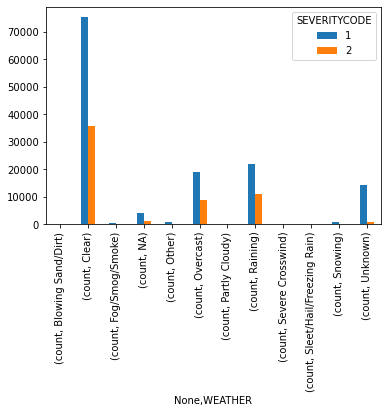

In [35]:
get_summary(df_clean, 'WEATHER')

* There are lots of rare levels, they share common ground with rain so that we will combine them into __Raining__.
* Combine missing values with __Unknown__ and check how many percent of the data is missing.

In [36]:
df_clean.WEATHER.replace(to_replace=['NA'],
                         value=['Unknown'],
                         inplace=True)
df_clean.WEATHER.replace(to_replace=['Snowing', 'Other', 'Fog/Smog/Smoke',
                                     'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
                                     'Severe Crosswind', 'Partly Cloudy'],
                         value=['Raining'] * 7,
                         inplace=True)

* Missing values are about 10% of the data. We can combine them with __Clear__ since it is the dominant level.

In [37]:
df_clean.WEATHER.replace(to_replace=['Unknown'],
                         value=['Clear'],
                         inplace=True)

##roadcond

In [38]:
get_frequency(df_clean, 'ROADCOND')

,freq
Wet,24.387
Dry,63.959
NA,2.575
Unknown,7.745
Snow/Slush,0.516
Ice,0.621
Other,0.068
Sand/Mud/Dirt,0.039
Standing Water,0.059
Oil,0.033


count                                                \
ROADCOND        Dry  Ice    NA Oil Other Sand/Mud/Dirt Snow/Slush   
SEVERITYCODE                                                        
1             84446  936  3952  40    89            52        837   
2             40064  273  1060  24    43            23        167   

                                            
ROADCOND     Standing Water Unknown    Wet  
SEVERITYCODE                                
1                        85   14329  31719  
2                        30     749  15755

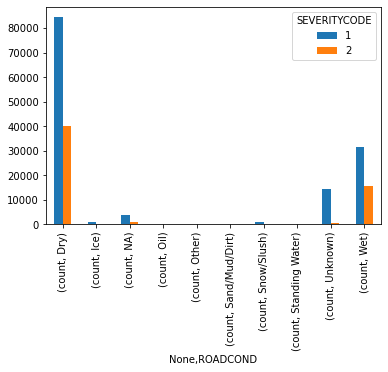

In [39]:
get_summary(df_clean, 'ROADCOND')

* We basically followed what we did to `weather` feature.

In [40]:
df_clean.ROADCOND.replace(to_replace=['NA', 'Unknown'],
                          value=['Dry']*2,
                          inplace=True)

In [41]:
df_clean.ROADCOND.replace(to_replace=['Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt',
                                      'Standing Water', 'Oil'],
                          value=['Wet'] * 6,
                          inplace=True)

##lightcond

In [42]:
get_frequency(df_clean, 'LIGHTCOND')

,freq
Daylight,59.657
Dark - Street Lights On,24.917
Dark - No Street Lights,0.790
NA,2.656
Unknown,6.921
Dusk,3.032
Dawn,1.285
Dark - Street Lights Off,0.616
Other,0.121
Dark - Unknown Lighting,0.006


count                           \
LIGHTCOND    Dark - No Street Lights Dark - Street Lights Off   
SEVERITYCODE                                                    
1                               1203                      883   
2                                334                      316   

                                                                             \
LIGHTCOND    Dark - Street Lights On Dark - Unknown Lighting  Dawn Daylight   
SEVERITYCODE                                                                  
1                              34032                       7  1678    77593   
2                              14475                       4   824    38544   

                                        
LIGHTCOND     Dusk    NA Other Unknown  
SEVERITYCODE                            
1             3958  4080   183   12868  
2             1944  1090    52     605

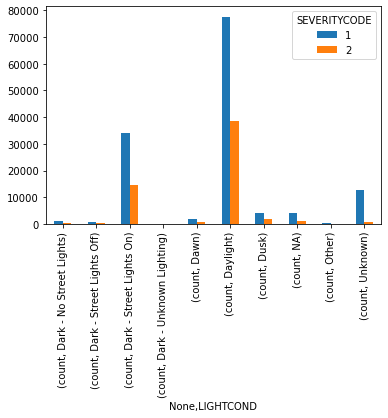

In [43]:
get_summary(df_clean, 'LIGHTCOND')

* The same applies to `lightcond` feature.
* There is a common ground between `weather`, `roadcond` and `lightcond` which is the structure of the missing values. All features have approximately same number of missing values and `unknown` feature. I believe that there are high correlation between those three features which can be further investigated with _contingency tables_.

In [44]:
df_clean.LIGHTCOND.replace(to_replace=['Dark - Street Lights On', 'Dusk', 'Dawn',
                                       'Dark - No Street Lights', 'Other',
                                       'Dark - Street Lights Off',
                                       'Dark - Unknown Lighting'],
                           value='Dark',
                           inplace=True)

In [45]:
df_clean.LIGHTCOND.replace(to_replace=['NA', 'Unknown'], value='Daylight',
                           inplace=True)

##sdot_colcode

In [46]:
get_frequency(df_clean, 'SDOT_COLCODE')

,freq
11,43.770
16,5.100
14,27.892
51,0.674
13,3.006
26,2.435
28,4.549
18,1.594
34,0.048
0,5.027


count                                                    \
SDOT_COLCODE      0        11      12      13       14      15      16   
SEVERITYCODE                                                             
1             9079.0  60871.0  1413.0  5653.0  36551.0  1529.0  9236.0   
2              708.0  24338.0    27.0   199.0  17748.0    75.0   692.0   

                                                                              \
SDOT_COLCODE      18     21    22    23      24    25      26     27      28   
SEVERITYCODE                                                                   
1              370.0   41.0   1.0  31.0   665.0  82.0  3568.0  130.0  6574.0   
2             2734.0  140.0  16.0  93.0  5853.0  20.0  1173.0   36.0  2282.0   

                                                                            \
SDOT_COLCODE     29    31    32    33    34   35   36   44   46   47    48   
SEVERITYCODE                                                                 
1             118.0  97.0  11.0  51.0  84.0  5.0  3.0  NaN  3.0  1.0  96.0   
2             361.0   7.0   1.0   2.0   9.0  1.0  1.0  8.0  NaN  NaN  11.0   

                                                                               \
SDOT_COLCODE      51   52   53     54    55     56   58   61    64    66   68   
SEVERITYCODE                                                                    
1              152.0  1.0  2.0   32.0  10.0   19.0  NaN  NaN   3.0   1.0  1.0   
2             1160.0  1.0  7.0  107.0  40.0  161.0  5.0  7.0  72.0  22.0  3.0   

                    
SDOT_COLCODE    69  
SEVERITYCODE        
1              1.0  
2             68.0

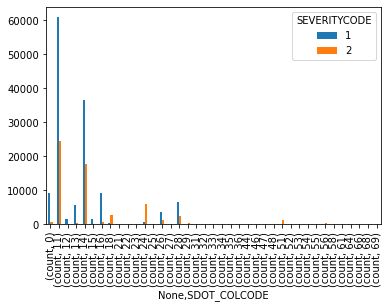

In [47]:
get_summary(df_clean, 'SDOT_COLCODE')

In [48]:
sdot_injury = [18, 21, 22, 23, 24, 29, 44, 51,
               54, 55, 56, 58, 61, 64, 66, 68, 69]
sdot_property = [code for code in df_clean.SDOT_COLCODE.unique() if code not in sdot_injury]

In [49]:
df_clean.SDOT_COLCODE.replace(to_replace=sdot_injury, value='sdot_injury', inplace=True)
df_clean.SDOT_COLCODE.replace(to_replace=sdot_property, value='sdot_property', inplace=True)

In [50]:
get_frequency(df_clean, 'SDOT_COLCODE')

,freq
sdot_property,93.684
sdot_injury,6.316


### Binary Variables

In [51]:
df_clean.SEVERITYCODE = np.where(df_clean.SEVERITYCODE == 1, 0 , 1)
df_clean.STATUS = np.where(df_clean.STATUS == 'Matched', 0, 1)
df_clean.INTKEY = np.where(df_clean.INTKEY == 'NA', 0, 1)
df_clean.INATTENTIONIND = np.where(df_clean.INATTENTIONIND == 'Y', 1, 0)
df_clean.UNDERINFL.replace(to_replace=['N', '0', 'Y', '1'], value=[0, 0, 1, 1],
                           inplace=True)
df_clean.PEDROWNOTGRNT = np.where(df_clean.PEDROWNOTGRNT == 'Y', 1, 0)
df_clean.SPEEDING = np.where(df_clean.SPEEDING == 'Y', 1, 0)
df_clean.SEGLANEKEY = np.where(df_clean.SEGLANEKEY == 0, 0, 1)
df_clean.CROSSWALKKEY = np.where(df_clean.CROSSWALKKEY == 0, 0, 1)
df_clean.HITPARKEDCAR = np.where(df_clean.HITPARKEDCAR == 'Y', 1, 0)

# Exploratory Data Analysis

In [52]:
df_clean.head()

,SEVERITYCODE,X,Y,STATUS,ADDRTYPE,INTKEY,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.323,47.7031,0,Intersection,1,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),sdot_property,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Overcast,Wet,Daylight,0,0,Entering at angle,0,0,0
1,0,-122.347,47.6472,0,Block,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),sdot_property,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0,Raining,Wet,Dark,0,0,From same direction - both going straight - bo...,0,0,0
2,0,-122.335,47.6079,0,Block,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),sdot_property,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,Overcast,Dry,Daylight,0,0,One parked--one moving,0,0,0
3,0,-122.335,47.6048,0,Block,0,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),sdot_property,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,0,0,From same direction - all others,0,0,0
4,1,-122.306,47.5457,0,Intersection,1,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),sdot_property,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Raining,Wet,Daylight,0,0,Entering at angle,0,0,0


In [92]:
def bar_plot(counts, labels, title, color):
    n = len(counts)
    fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
    bars = ax.bar(range(n), counts, color=color)  # bar plot
    ax.set_ylabel('Count', labelpad=10)  # lable on y-axis (on the left)
    ax.set_xticks(range(n))  # sets the number of ticks on the x-axis
    # sets the label of the ticks on the x-axis
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 145000)
    # adjust the gap between the tickers on the y-axis on the left
    ax.yaxis.set_major_locator(ticker.MultipleLocator(20000))
    ax.set_title(title, size=14, pad=10)  # set the title
    ax2 = ax.twinx()  # puts another y-axis on the right
    ax2.set_ylabel('Frequency (%)')  # label on the y-axis (on the right)
    ax2.set_ylim(0, 104)  # set the range to be shown on the y-axis
    # adjust the gap between the tickers on the y-axis on the right
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    # selects each bar in the figure and gets height and width of the bars
    # use those to place the counts of each class on the bars
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        width = bar.get_width()
        ax.text(bar.get_x() + width/2, height,
                s='{:,}'.format(count),
                ha='center', va='bottom')
    plt.show()  # shows the plot

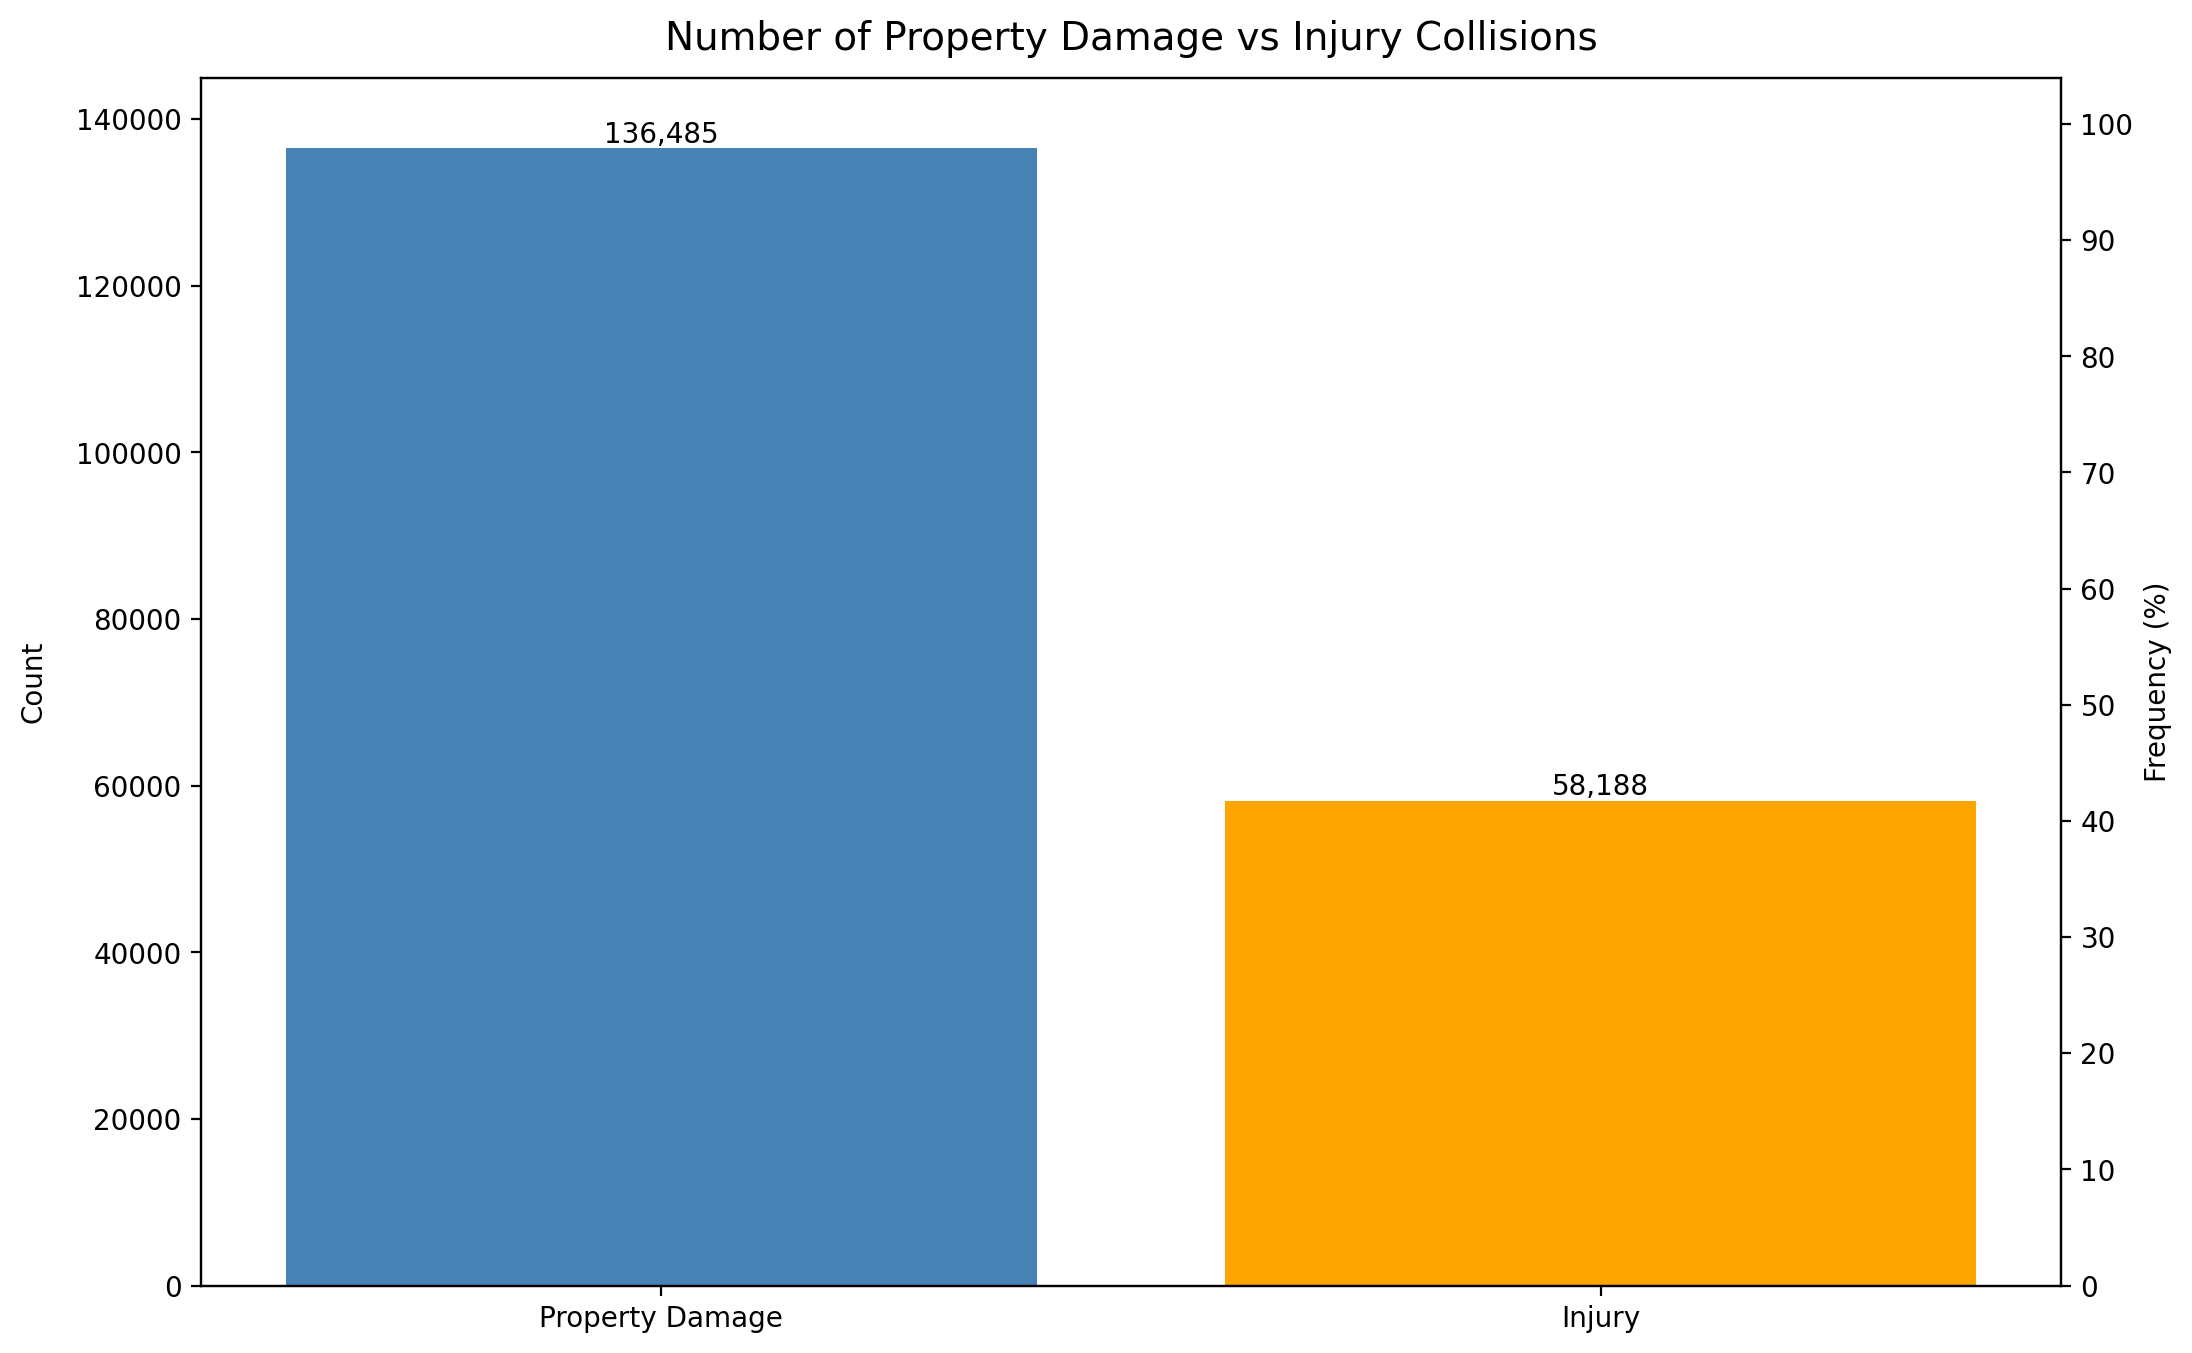

In [93]:
counts = [df_clean[df_clean.SEVERITYCODE == 0].shape[0],
          df_clean[df_clean.SEVERITYCODE == 1].shape[0]]
labels = ['Property Damage', 'Injury']
color=['steelblue', 'orange']
title = 'Number of Property Damage vs Injury Collisions'
bar_plot(counts, labels, title, color)

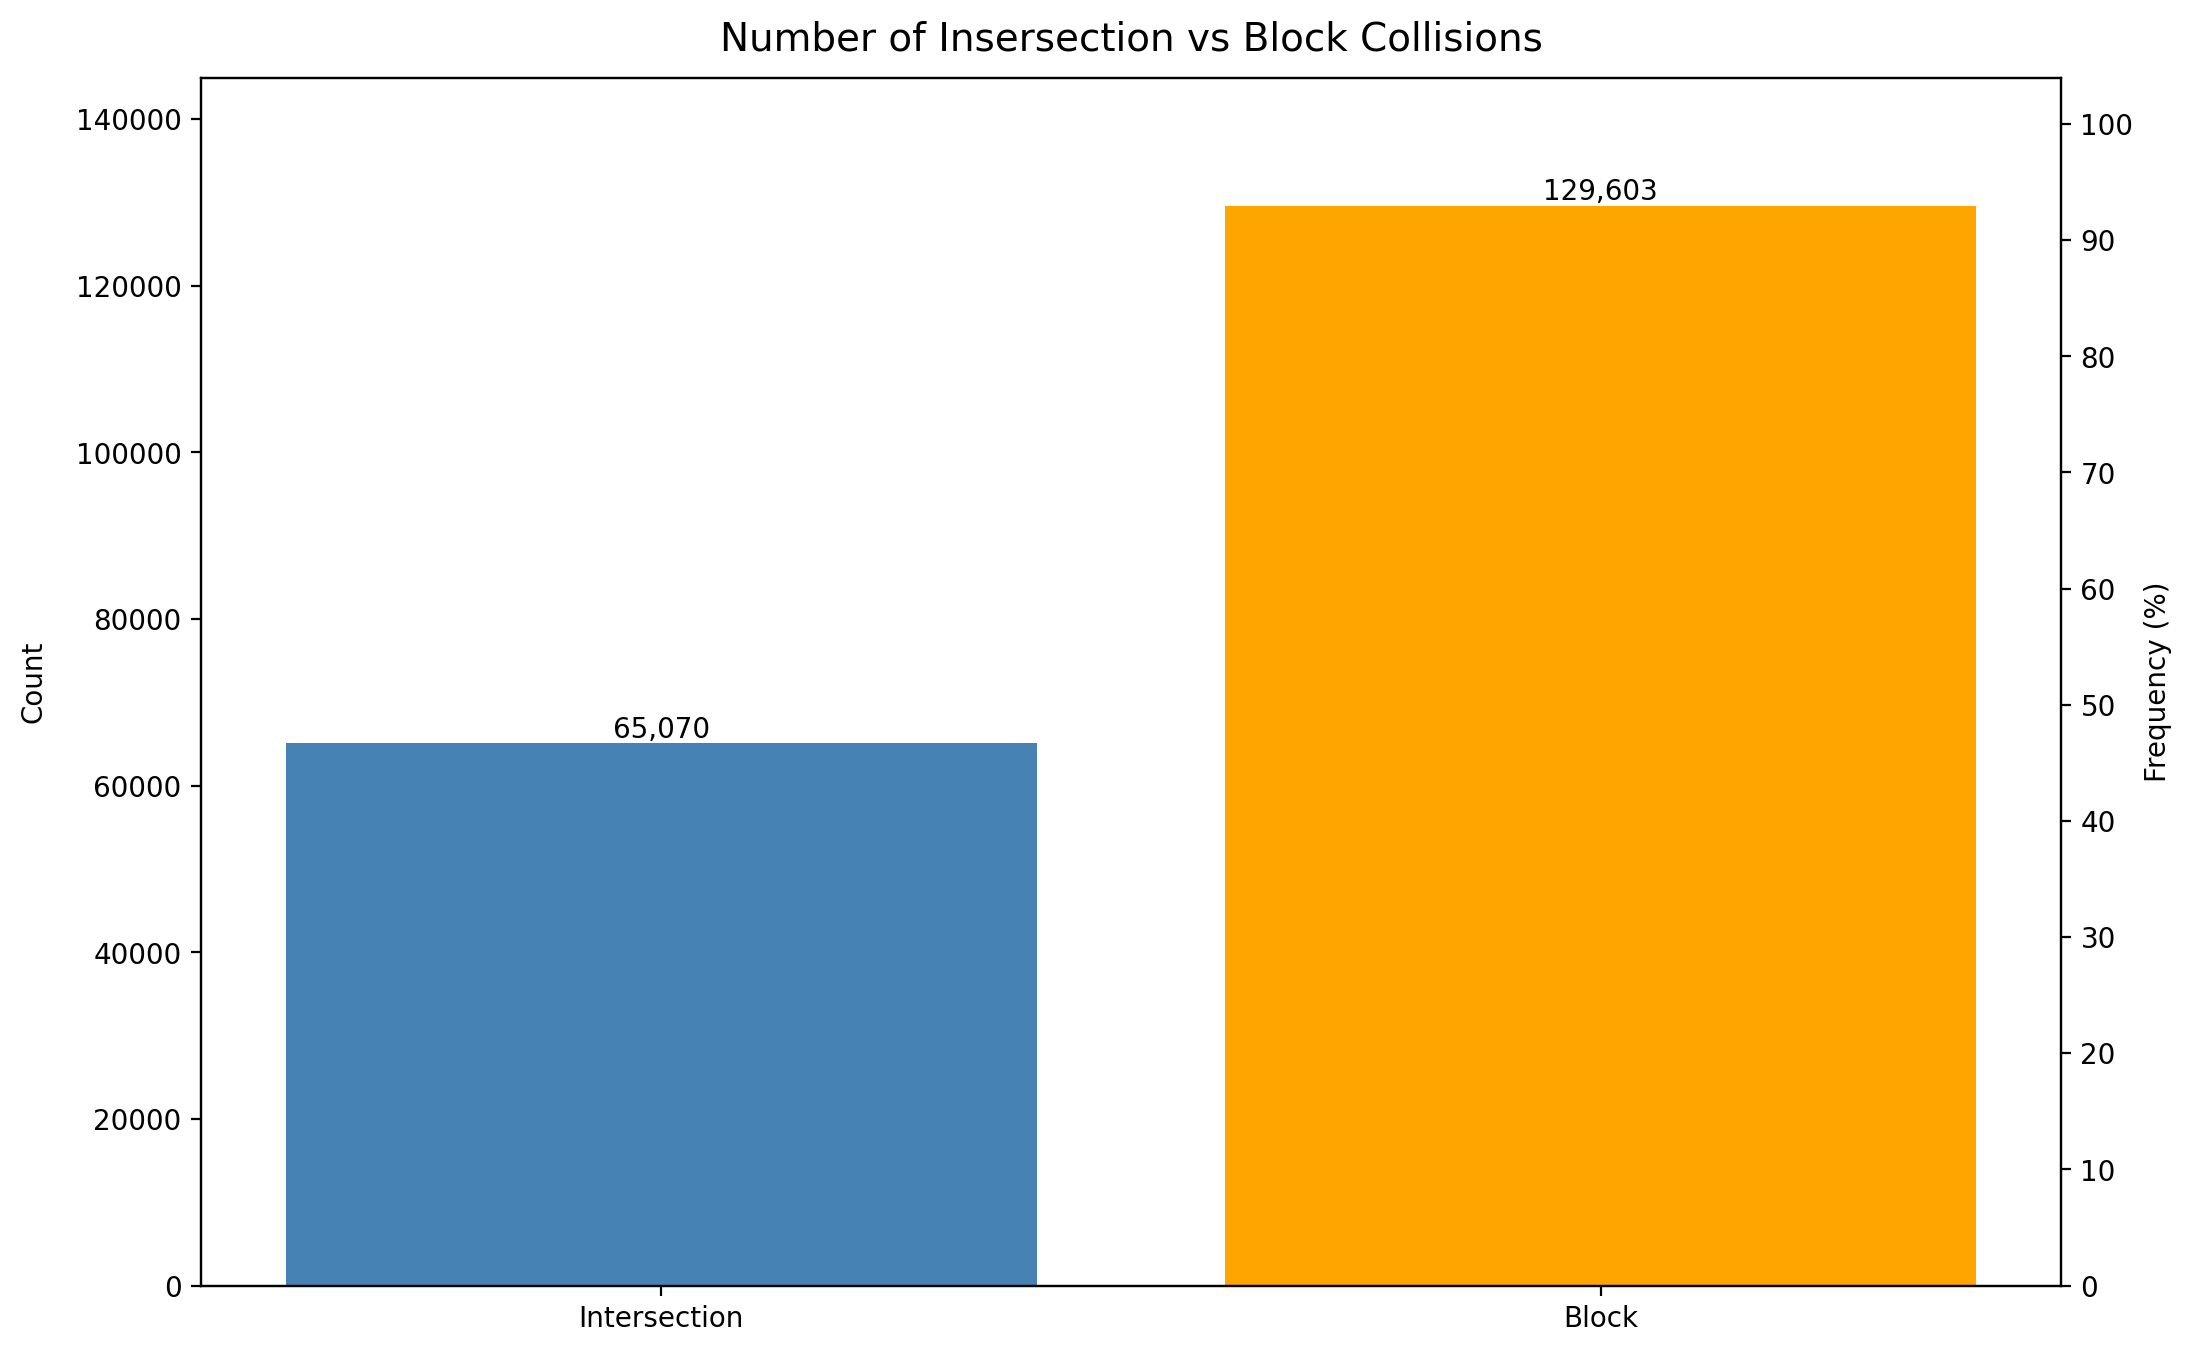

In [94]:
counts = [df_clean[df_clean.ADDRTYPE == 'Intersection'].shape[0],
          df_clean[df_clean.ADDRTYPE == 'Block'].shape[0]]
labels = ['Intersection', 'Block']
color = ['steelblue', 'orange']
title = 'Number of Insersection vs Block Collisions'
bar_plot(counts, labels, title, color)

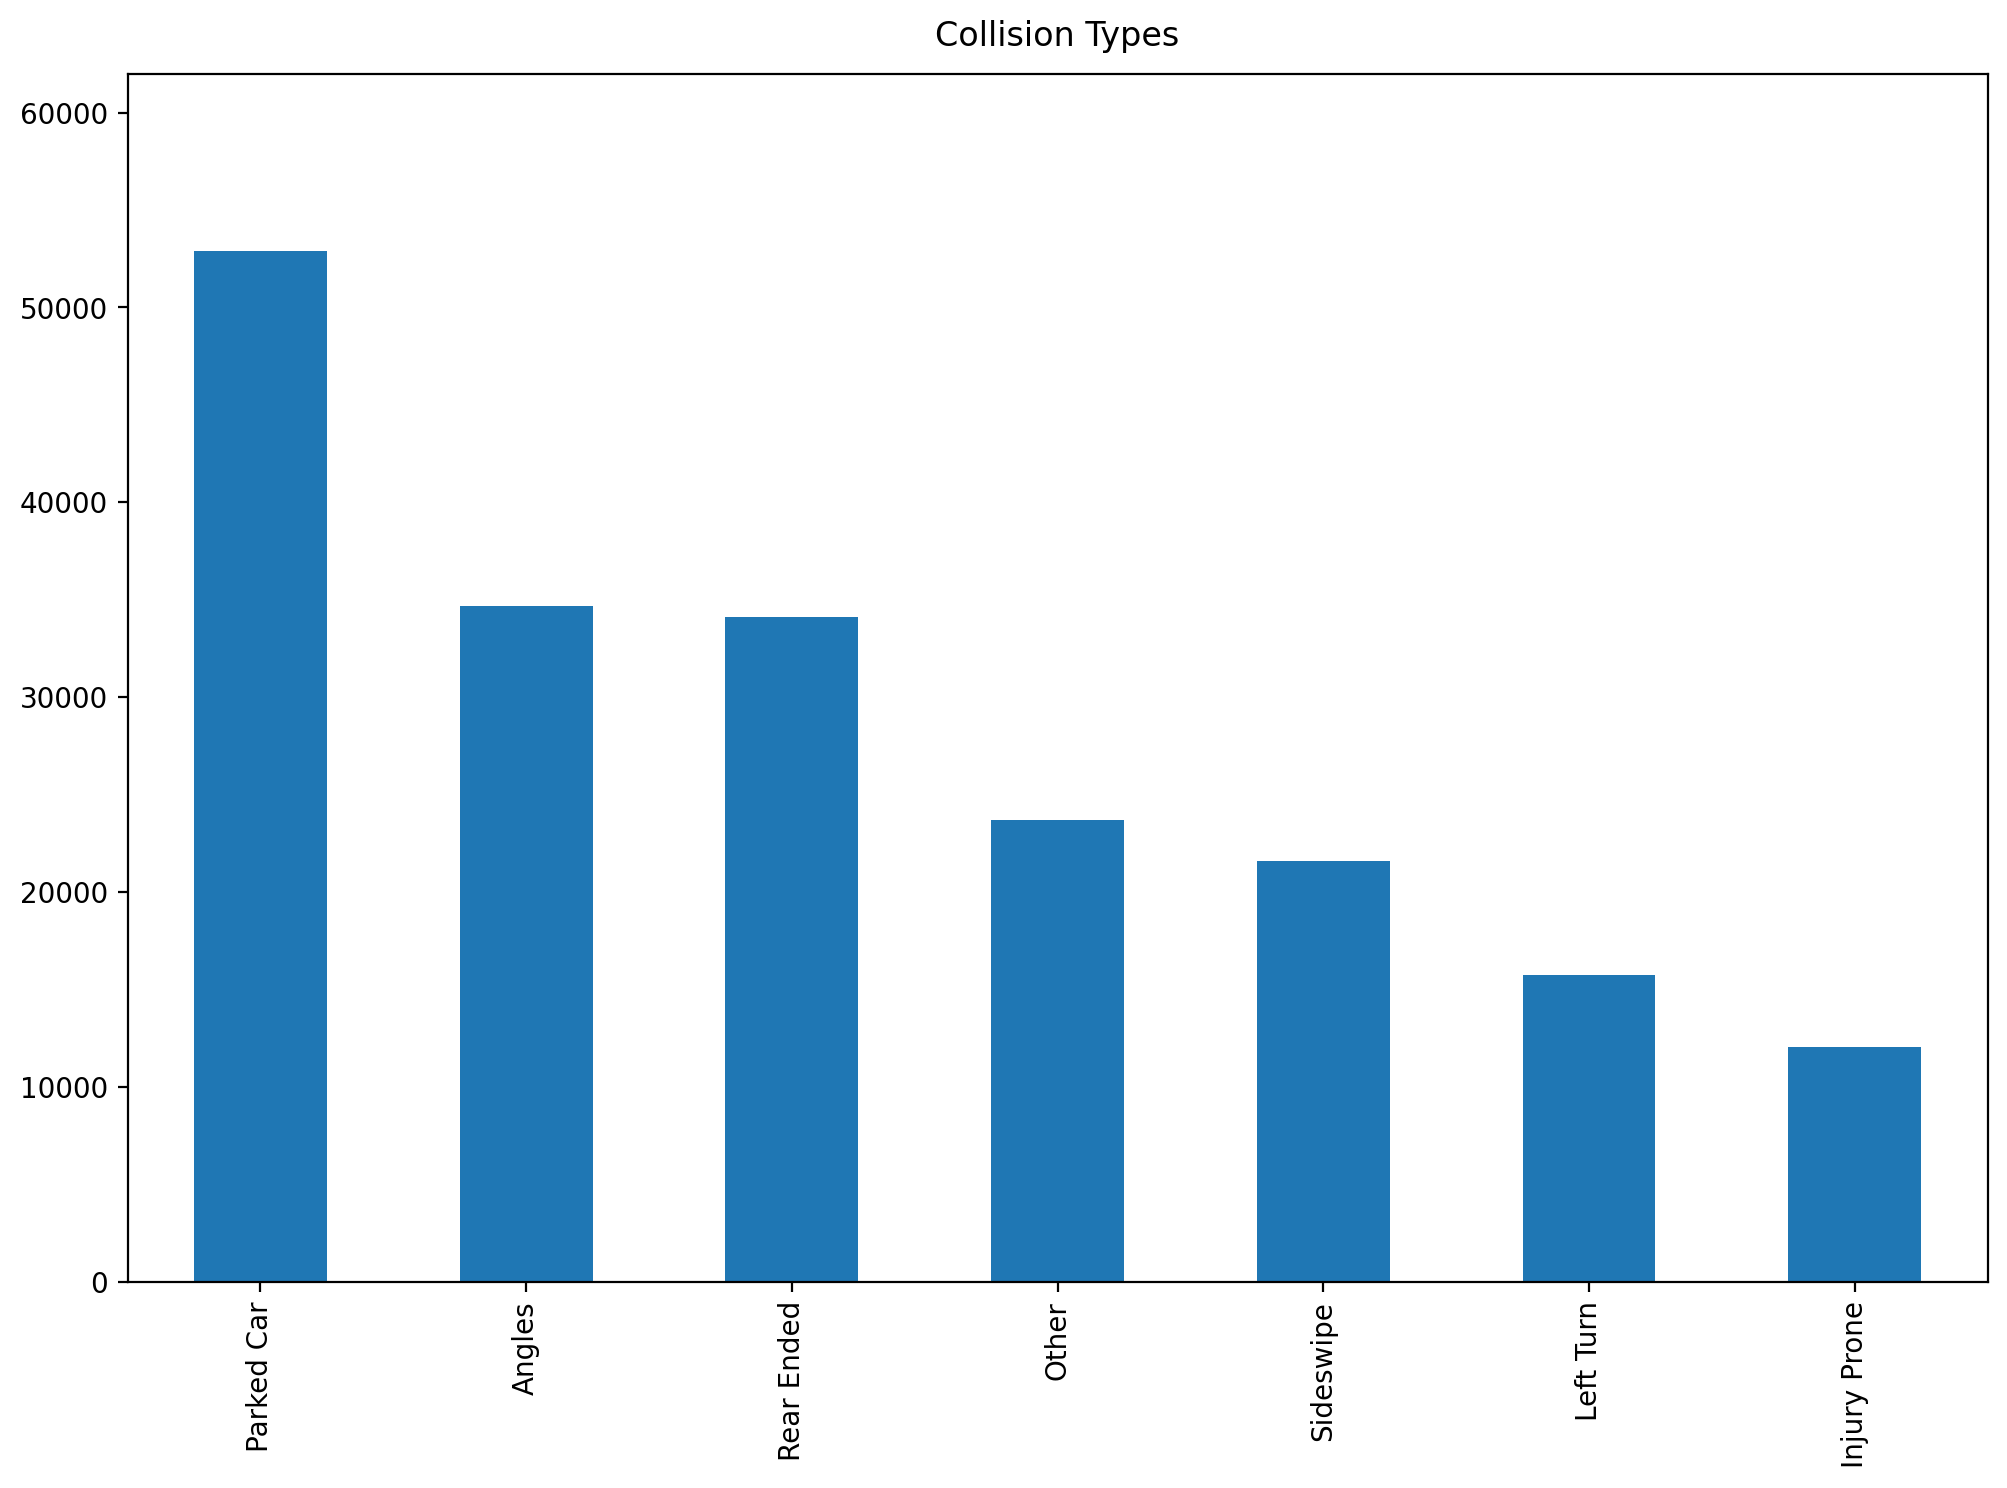

In [103]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
temp = df_clean.groupby(['COLLISIONTYPE']).size().rename('count').to_frame()
temp.sort_values('count', ascending=False).plot.bar(legend=False,ax=ax)
ax.set_ylim(0, 62000)
ax.set_title('Collision Types', pad=10)
ax.set_xlabel('')
plt.show()

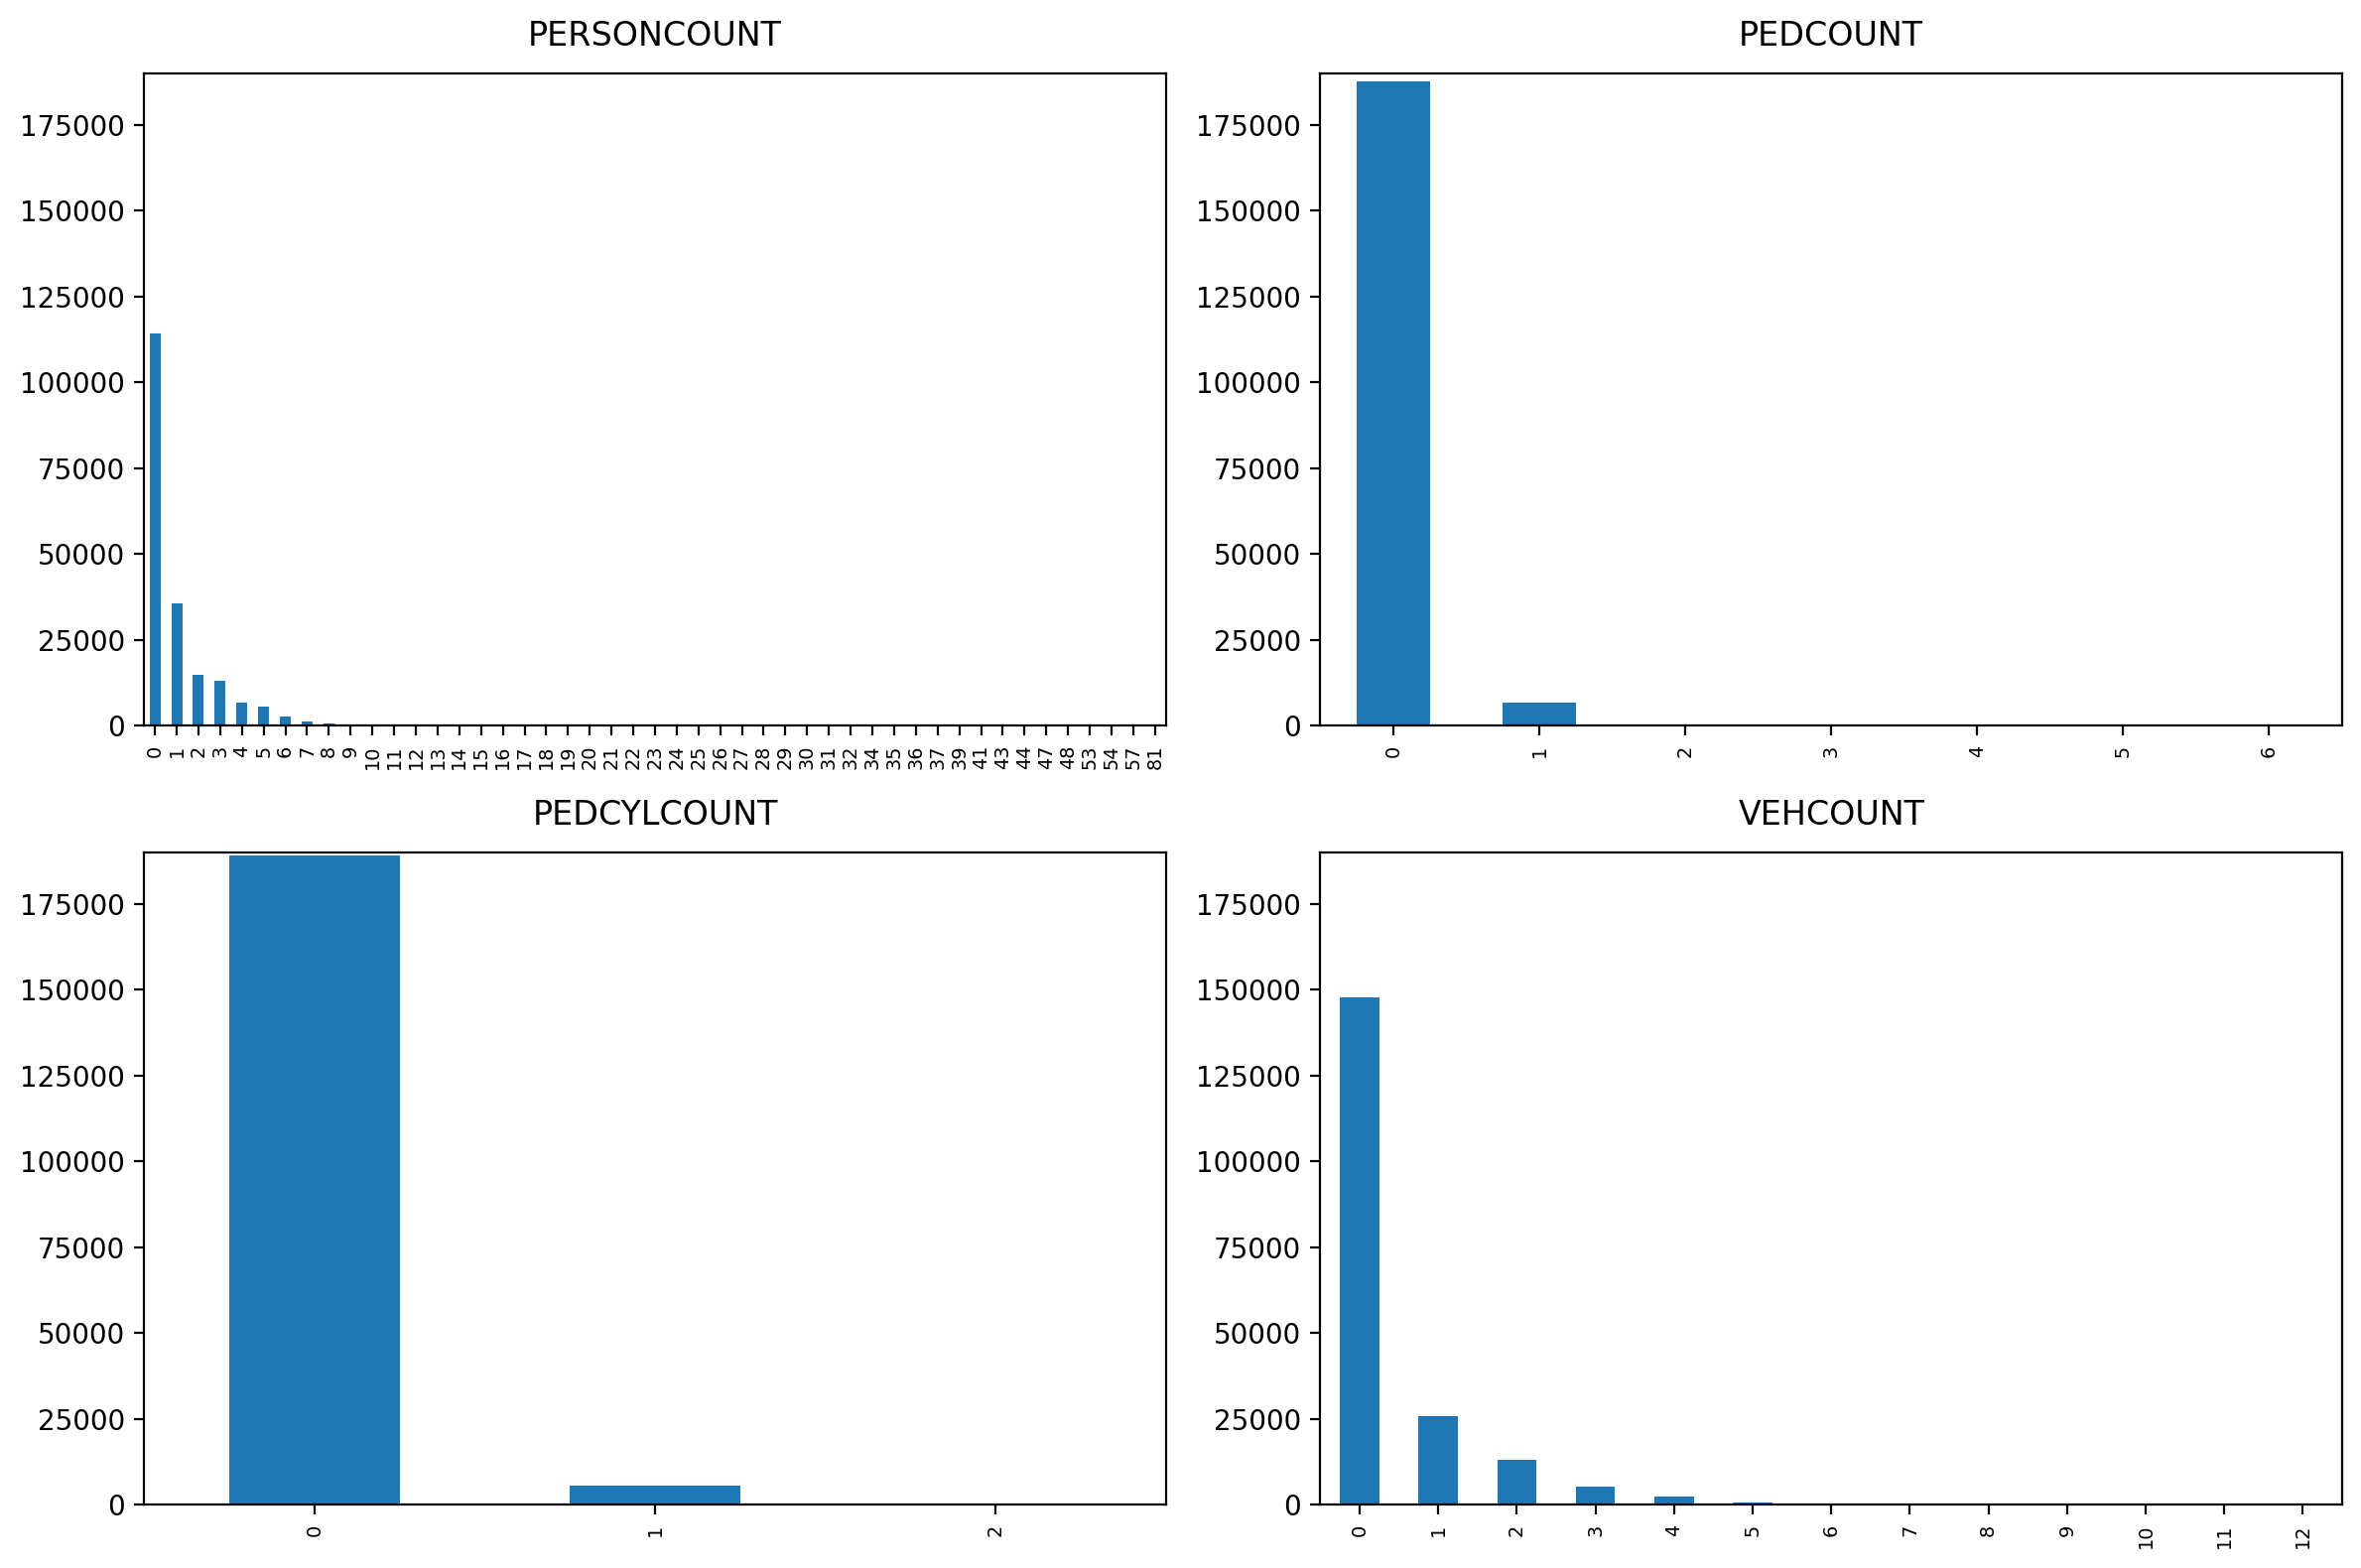

In [127]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=200)
axes = axes.flatten()
for ax, x in zip(axes, ['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']):
    temp = df_clean.groupby(x).size().rename('count').to_frame()
    temp.sort_values('count', ascending=False).plot.bar(legend=False,ax=ax)
    ax.set_ylim(0, 190000)
    ax.set_xticklabels(temp.index, fontsize='x-small', rotation=90)
    ax.set_xlabel('')
    ax.set_title(x, pad=10)
plt.tight_layout()
plt.show()

* These bar plots show us that the missing values for `PERSONCOUNT` and `VEHCOUNT` are coded as `0`. Since, it is not possible to have `0` person or vehicle in a collision.
* The bar plots for `PEDCYLCOUNT` and `PEDCOUNT` are reasonable since it is not expected to have a 